In [1]:
# Exploratory Data Analysis
# Author: Frank L Weatherspoon Jr. 02/29/2024

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\frank_jk22l4o'

In [5]:
file_path = os.path.abspath('SampleSuperstore.csv')

In [6]:
print("File Path", file_path)

File Path C:\Users\frank_jk22l4o\SampleSuperstore.csv


In [7]:
new_directory = "C:\\Users\\frank_jk22l4o\downloads"

In [8]:
# Changing the cuurent working directory so that the system will know where to pull file from "downloads"
os.chdir(new_directory)

In [9]:
data = pd.read_csv('SampleSuperstore.csv')

In [10]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
column_names = data.columns

In [12]:
column_names

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
data.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [17]:
data.head(7)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656


In [18]:
data.tail(7)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [19]:
# Calculate Total Sales:
tot_sales = data['Sales'].sum()

In [20]:
print(tot_sales)

2297200.8603000003


In [21]:
# Calculate Total Profit:
tot_profit = data['Profit'].sum()

In [22]:
print(tot_profit)

286397.0217


In [23]:
# Sales & Profit divided by Category:
cat_sales_profit = data.groupby('Category').agg(tot_sales = ('Sales','sum'), tot_profit = ('Profit','sum'))

In [24]:
print(cat_sales_profit)

                   tot_sales   tot_profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481


In [25]:
# Sales & Profit divided by their Sub-Category:
sub_cat = data.groupby('Sub-Category').agg(tot_sales = ('Sales','sum'), tot_profit = ('Profit','sum'))

In [26]:
print(sub_cat)

                tot_sales  tot_profit
Sub-Category                         
Accessories   167380.3180  41936.6357
Appliances    107532.1610  18138.0054
Art            27118.7920   6527.7870
Binders       203412.7330  30221.7633
Bookcases     114879.9963  -3472.5560
Chairs        328449.1030  26590.1663
Copiers       149528.0300  55617.8249
Envelopes      16476.4020   6964.1767
Fasteners       3024.2800    949.5182
Furnishings    91705.1640  13059.1436
Labels         12486.3120   5546.2540
Machines      189238.6310   3384.7569
Paper          78479.2060  34053.5693
Phones        330007.0540  44515.7306
Storage       223843.6080  21278.8264
Supplies       46673.5380  -1189.0995
Tables        206965.5320 -17725.4811


In [27]:
# Analysis By State:
State_Anaylsis = data.groupby('State').agg(tot_sales = ('Sales','sum'), tot_profit = ('Profit','sum'))

In [28]:
print(State_Anaylsis.head(15))

                        tot_sales  tot_profit
State                                        
Alabama                19510.6400   5786.8253
Arizona                35282.0010  -3427.9246
Arkansas               11678.1300   4008.6871
California            457687.6315  76381.3871
Colorado               32108.1180  -6527.8579
Connecticut            13384.3570   3511.4918
Delaware               27451.0690   9977.3748
District of Columbia    2865.0200   1059.5893
Florida                89473.7080  -3399.3017
Georgia                49095.8400  16250.0433
Idaho                   4382.4860    826.7231
Illinois               80166.1010 -12607.8870
Indiana                53555.3600  18382.9363
Iowa                    4579.7600   1183.8119
Kansas                  2914.3100    836.4435


In [29]:
# Customer Analysis
Cust_analysis = data.groupby('Segment').agg(tot_sales = ('Sales','sum'), tot_profit = ('Profit','sum'))

In [30]:
print(Cust_analysis)

                tot_sales   tot_profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


In [31]:
# Top Products Sold:
top_sellers = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

In [32]:
print(top_sellers)

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64


In [33]:
# Ship Mode Analysis:
ship_mode_anal = data.groupby('Ship Mode').agg(Tot_Sales=('Sales', 'sum'), Tot_Profit=('Profit', 'sum'))

In [34]:
print(ship_mode_anal)

                   Tot_Sales   Tot_Profit
Ship Mode                                
First Class     3.514284e+05   48969.8399
Same Day        1.283631e+05   15891.7589
Second Class    4.591936e+05   57446.6354
Standard Class  1.358216e+06  164088.7875


In [35]:
# Least Sellers: items that need help selling - Marketing Department issue
least_sellers = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=True).head(10)

In [36]:
print(least_sellers)

Sub-Category
Fasteners        3024.2800
Labels          12486.3120
Envelopes       16476.4020
Art             27118.7920
Supplies        46673.5380
Paper           78479.2060
Furnishings     91705.1640
Appliances     107532.1610
Bookcases      114879.9963
Copiers        149528.0300
Name: Sales, dtype: float64


In [37]:
# Average Sales/ Profitd per order placed:
data['Order Gains'] = data['Profit'] / data['Sales']

In [38]:
avg_sales = data['Sales'].mean()

In [39]:
print("Average Sales:", avg_sales)

Average Sales: 229.85800083049833


In [40]:
avg_profit = data['Profit'].mean()

In [41]:
print("Average Profit:", avg_profit)

Average Profit: 28.65689630778467


In [42]:
avg_gain = data["Order Gains"].mean()

In [43]:
print("Average Gain:", avg_gain)

Average Gain: 0.12031392972104459


In [44]:
print(data.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Order Gains'],
      dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

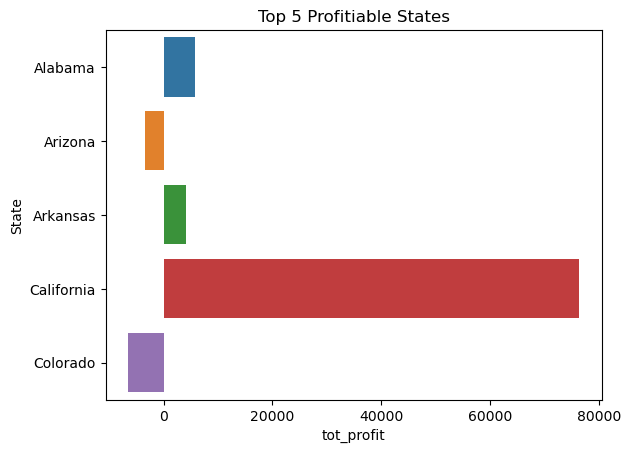

In [45]:
# VIZUALIZATIONS:
data = State_Anaylsis.head(5).reset_index()
sns.barplot(x='tot_profit', y='State', data = data)
plt.title('Top 5 Profitiable States')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

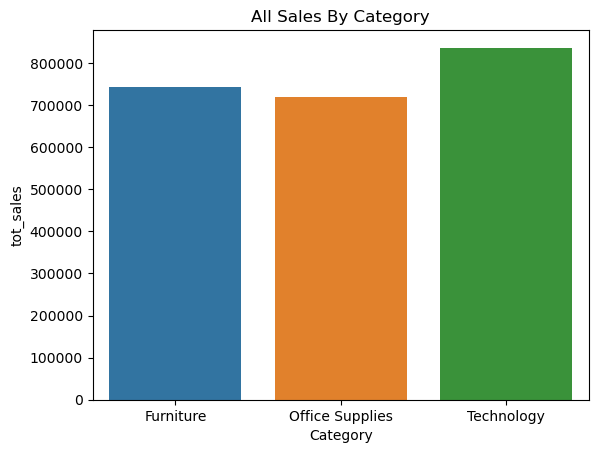

In [46]:
sns.barplot(x='Category', y='tot_sales', data = cat_sales_profit.reset_index())
plt.title("All Sales By Category")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

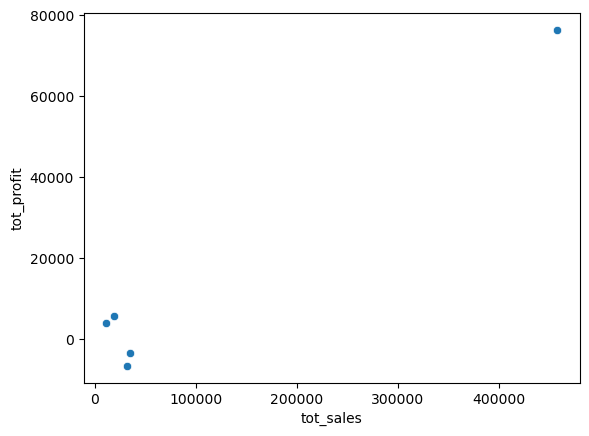

In [47]:
sns.scatterplot(x='tot_sales', y='tot_profit', data= data)
plt.show

array([[<Axes: title={'center': 'tot_sales'}>,
        <Axes: title={'center': 'tot_profit'}>]], dtype=object)

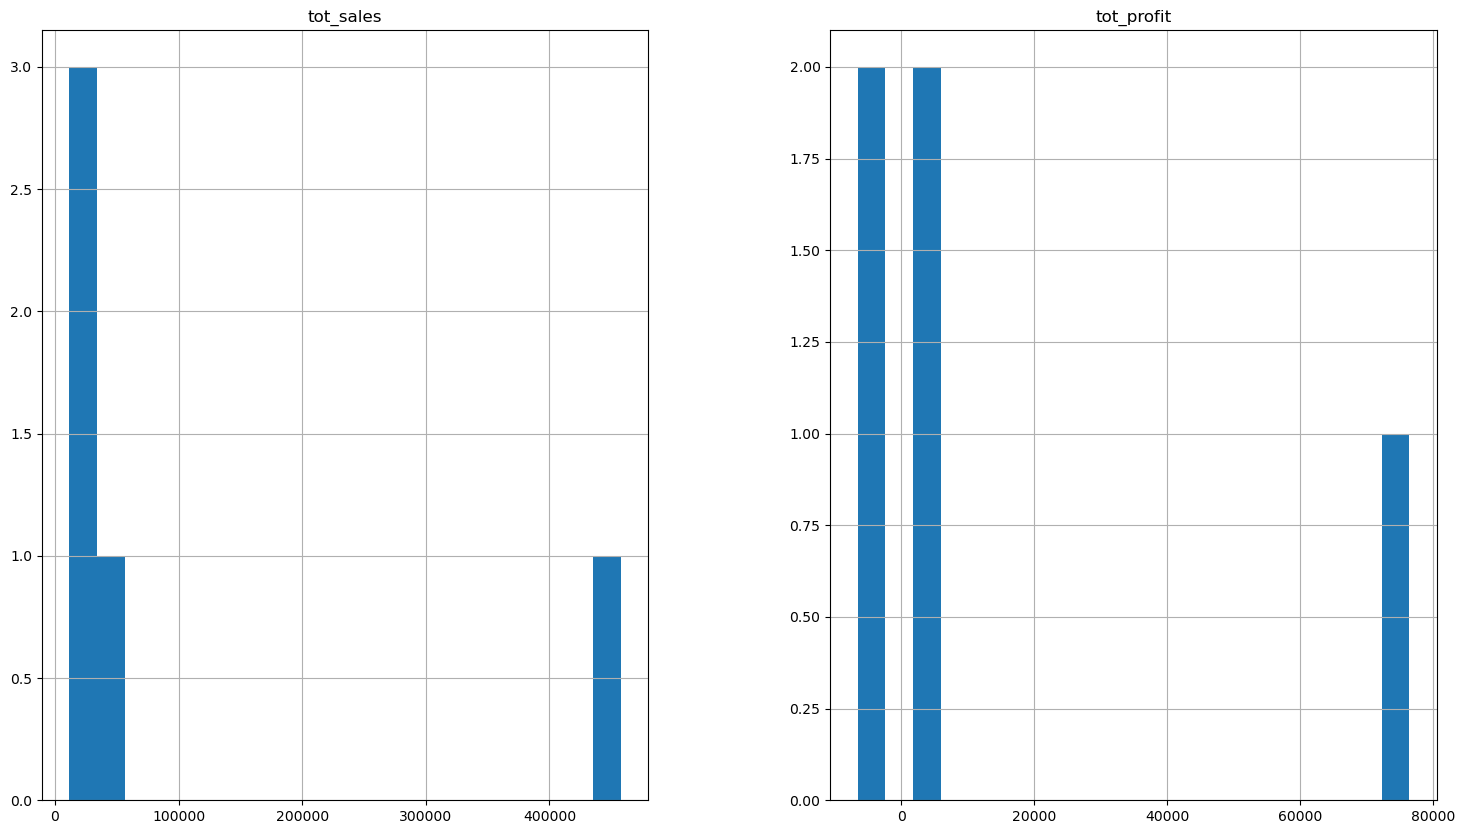

In [48]:
data.hist(bins=20, figsize=(18,10))

In [49]:
data2 = pd.read_csv('SampleSuperstore.csv')

In [50]:
pivot = pd.pivot_table(data2, values ='Sales', index = 'State', columns = 'Category', aggfunc = 'sum')

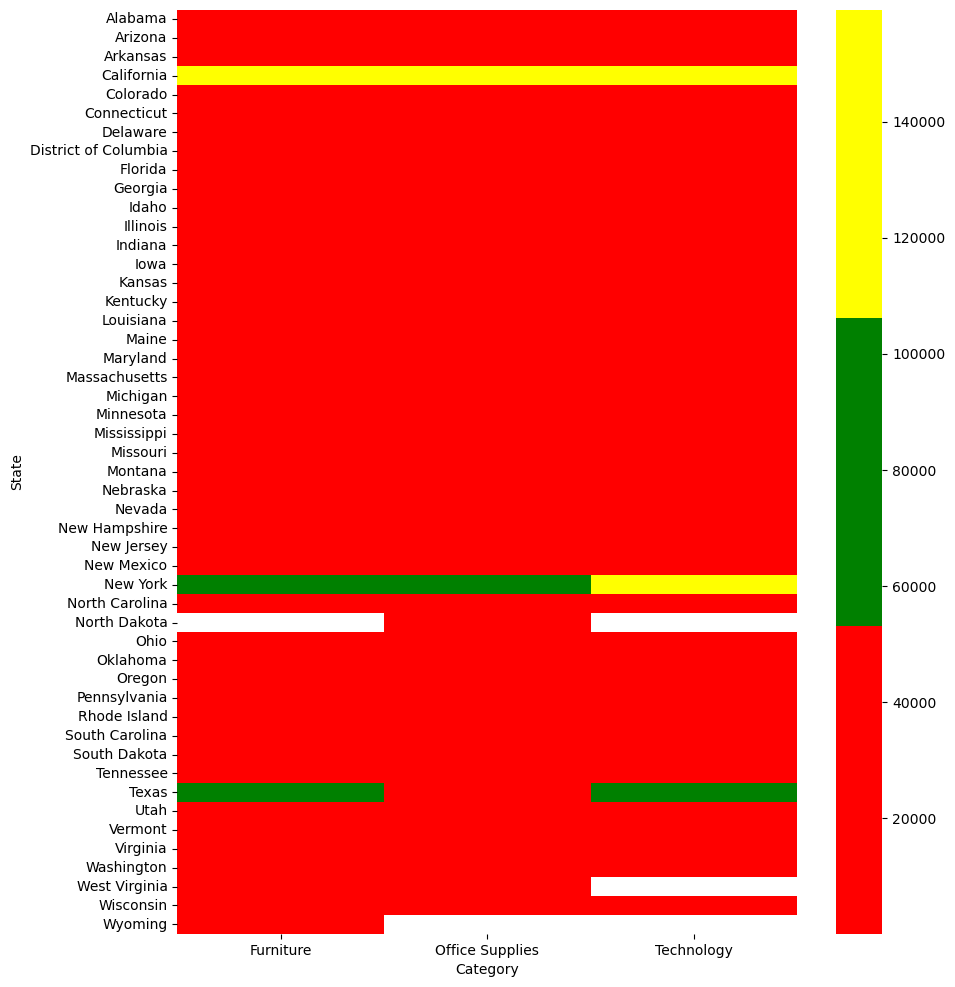

In [51]:
plt.figure(figsize=(10,12))
custom_palette = sns.color_palette(['red', 'green', 'yellow'])
sns.heatmap(pivot, cmap=custom_palette)
plt.show()

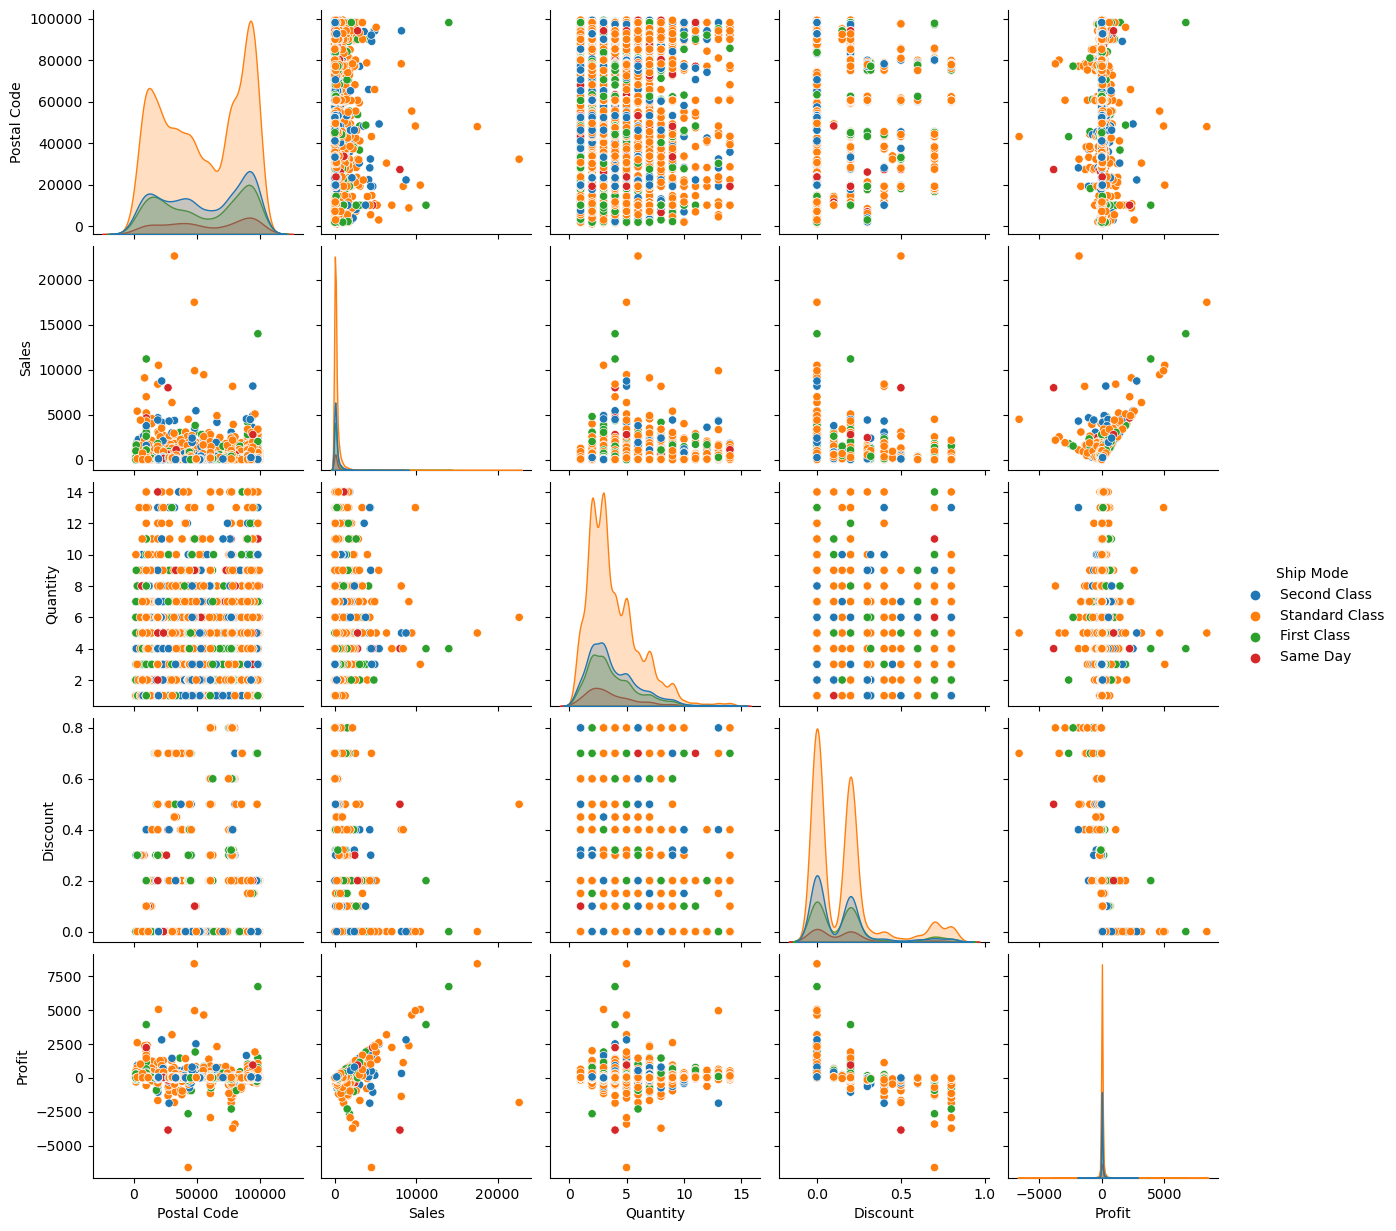

In [52]:
sns.pairplot(data2, hue = 'Ship Mode')

<Axes: xlabel='Ship Mode', ylabel='count'>

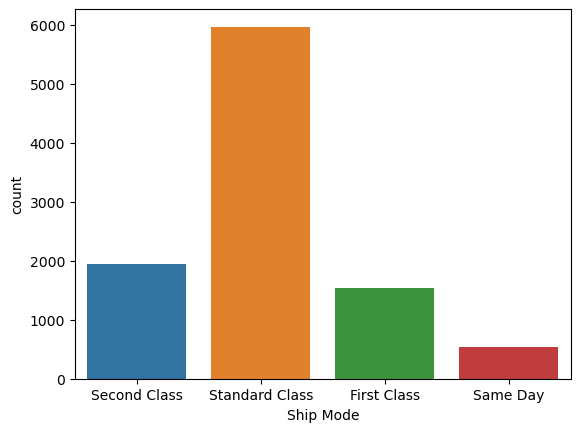

In [53]:
sns.countplot(x = 'Ship Mode', data = data2, palette = 'tab10')

In [54]:
# List all numneric colums:
numeric_columns = data2.select_dtypes(include=['Float64', 'int64']).columns

In [55]:
print(numeric_columns)

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [56]:
# Correlation:
corr_matrix = data2[numeric_columns].corr()

In [57]:
print(corr_matrix)

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


In [58]:
X = data2[['Sales', 'Quantity', 'Discount']]
Y = data2['Profit']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [60]:
print(X_test,Y_test)

        Sales  Quantity  Discount
3125  563.808         4       0.2
1441   36.672         2       0.2
4510   37.300         2       0.0
39    212.058         3       0.3
4509  171.288         3       0.2
...       ...       ...       ...
9956   46.350         5       0.0
1561    2.780         1       0.0
1670   16.680         3       0.2
6951  479.988         2       0.4
3910  352.450         5       0.5

[1999 rows x 3 columns] 3125     21.1428
1441     11.4600
4510     17.1580
39      -15.1470
4509     -6.4233
          ...   
9956     21.7845
1561      0.7228
1670      5.2125
6951     55.9986
3910   -211.4700
Name: Profit, Length: 1999, dtype: float64


In [61]:
model = LinearRegression()

In [62]:
model.fit(X_train, Y_train)

LinearRegression()

In [63]:
# Predictions:
y_pred = model.predict(X_test)

In [64]:
mse = mean_squared_error(Y_test, y_pred)

In [65]:
print(mse)

83592.67395643325


In [66]:
r2 = r2_score(Y_test, y_pred)

In [67]:
print(r2)

-0.7240890405096128


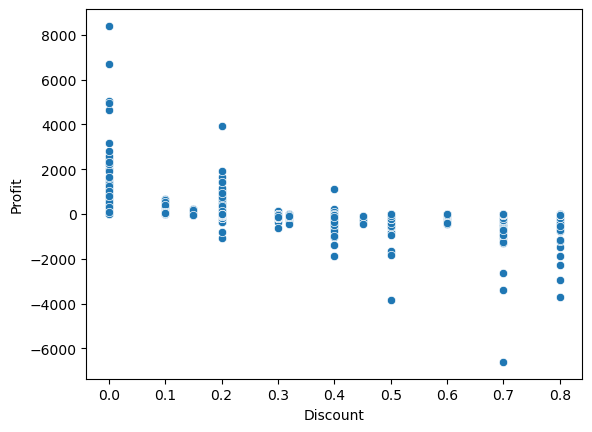

In [68]:
sns.scatterplot(x = 'Discount', y = 'Profit', data = data2)
plt.show()